## Question ##

### Since, The Gross Principal Losses badly affect the profitablity of a Financial Institution. So, our focus will be upon understanding and finding answer to main question i.e. What are the factors which are responsible for Gross Principal losses? 
So, that Prospers Financial Company can strategize upon bringing up profitability by reducing losses.
#### The analysis is divided into two parts. The first one is the exploration Part and the second one is the explanation Part.

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# Exploratory

In [132]:
df = pd.read_csv("prosperLoanData.csv")

In [133]:
df.head()

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380  ...         -133.18                0.0   
1        0.0920       0.0820  ...            0.00                0.0   
2        0.2750       0.2400  ...          -24.20                0.0   
3        0.0974       0.0874  ...         -108.01                0.0   
4        0.2085       0.1985  ...          -60.27                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  \
0                    0.0                  0.0                             0.0   
1                    0.0                  0.0                             0.0   
2                    0.0                  0.0                             0.0   
3                    0.0                  0.0                             0.0   
4                    0.0                  0.0                             0.0   

   PercentFunded  Recommendations InvestmentFromFriendsCount  \
0            1.0                0                          0   
1            1.0                0                          0   
2            1.0                0                          0   
3            1.0                0                          0   
4            1.0                0                          0   

  InvestmentFromFriendsAmount Investors  
0                         0.0       258  
1                         0.0         1  
2                         0.0        41  
3                         0.0       158  
4                         0.0        20  

[5 rows x 81 columns]

In [137]:
#To get an Idea about the kind of data and its types we have.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [138]:
# To know whether the Credit Grade is categorial data and how many categories are there.
df['CreditGrade'].nunique()

8

#### Q 1. What is the distribution of borrowers based upon the Credit Grade?
(The Credit rating that was assigned at the time the listing went live. Applicable for listings pre-2009 period and will only be populated for those listings.)

In [136]:
# Univariate Exploration
base_color = sb.color_palette()[0]
base_order = df['CreditGrade'].value_counts().index
sb.countplot(data = df, x = 'CreditGrade', color = base_color, order = base_order)
plt.title("Distribution of Borrowers Based Upon Credit Grade")
plt.ylabel("Number of Borrowers")
plt.xlabel("Credit Grade - The Credit rating that was assigned at the time the listing went live.");

From the above figure we got an idea that most of the borrowers fall under the category of C, D and B category of Credit Grade. But, this exploration is just done to understand our data.

In [139]:
# Income Range can be a factor which is responsible for loans to be profitable or not.
df['IncomeRange'].nunique()

8

#### Q 2. What is the distribution of borrowers based upon the income range?

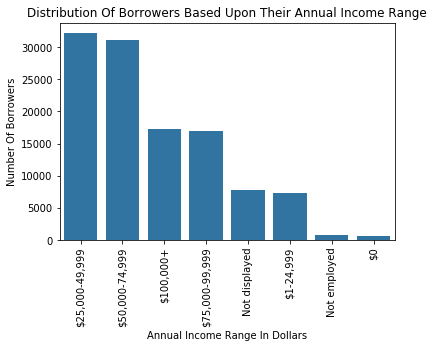

In [140]:
#univariate Exploration about income range.
base_color = sb.color_palette()[0]
b_order = df['IncomeRange'].value_counts().index
sb.countplot(data = df, x = 'IncomeRange', color = base_color, order = b_order )
plt.xticks(rotation = 90)
plt.title("Distribution Of Borrowers Based Upon Their Annual Income Range")
plt.ylabel("Number Of Borrowers")
plt.xlabel("Annual Income Range In Dollars");

Most many borrower fall under the category of Annual Income range of dollars 25,000 - 49,999 and dollars 50,000 - 74,999, which are nearly double than any other categories when compared individually.

#### Q 3. Is there a relationship that exists between Income Range and Gross Principal Loss ?
(Gross Principal Loss  - The gross charged off amount of the loan.)

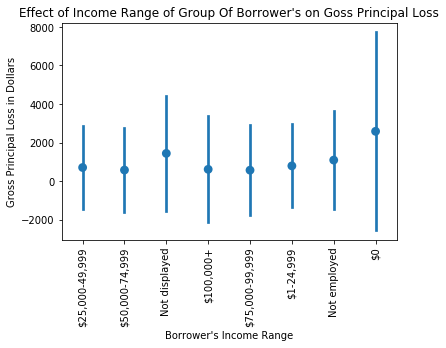

In [141]:
# Bivariate Exploration
base_color = sb.color_palette()[0]
sb.pointplot(data = df, x = 'IncomeRange', y = 'LP_GrossPrincipalLoss', color = base_color, ci = 'sd', linestyles= " ")
plt.xticks(rotation = 90)
plt.title('Relationship between Income Range and Gross Principal loss')
plt.title("Effect of Income Range of Group Of Borrower's on Goss Principal Loss")
plt.ylabel("Gross Principal Loss in Dollars")
plt.xlabel("Borrower's Income Range");

From the above figure we can say that different group of borrowers based upon Income Range showed different Gross Principal Losses. 

In [142]:
# Trying to understand the data type and how can it be used in analysis. But, seems doesnt fit to our exploration currently.
df['EstimatedLoss'].unique()

array([   nan, 0.0249, 0.0925, 0.0449, 0.1275, 0.0799, 0.0099, 0.089 ,
       0.0524, 0.0274, 0.0224, 0.165 , 0.1225, 0.1025, 0.1575, 0.1075,
       0.0649, 0.021 , 0.0624, 0.0399, 0.038 , 0.1625, 0.0424, 0.013 ,
       0.0899, 0.0595, 0.1475, 0.1175, 0.0149, 0.0724, 0.0565, 0.0699,
       0.0299, 0.0474, 0.0324, 0.0774, 0.119 , 0.1325, 0.0674, 0.13  ,
       0.0349, 0.0824, 0.112 , 0.0975, 0.147 , 0.1375, 0.0495, 0.0124,
       0.1425, 0.0849, 0.149 , 0.142 , 0.0599, 0.0749, 0.0199, 0.099 ,
       0.052 , 0.065 , 0.183 , 0.0574, 0.1125, 0.006 , 0.042 , 0.08  ,
       0.015 , 0.0874, 0.087 , 0.098 , 0.0074, 0.02  , 0.033 , 0.108 ,
       0.1   , 0.19  , 0.1675, 0.0499, 0.0549, 0.0374, 0.085 , 0.107 ,
       0.24  , 0.17  , 0.0174, 0.05  , 0.146 , 0.035 , 0.366 , 0.18  ,
       0.105 , 0.088 , 0.026 , 0.1525, 0.07  , 0.01  , 0.061 , 0.14  ,
       0.203 , 0.0155, 0.0325, 0.0195, 0.345 , 0.0075, 0.077 , 0.195 ,
       0.0765, 0.0049, 0.25  , 0.041 , 0.062 , 0.1725, 0.1405, 0.0085,
      

In [143]:
# Trying to understand the data type and how can it be used in analysis.
df['DebtToIncomeRatio'].nunique()

1207

In [144]:
# Trying to understand the data type and how can it be used in analysis.
df['BorrowerState'].nunique()

51

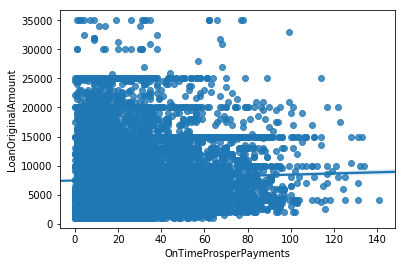

In [145]:
# Trying to find a Bivariate relationship.
sb.regplot(data = df, x = 'OnTimeProsperPayments', y = 'LoanOriginalAmount')

From the above figure we tried to find a relation between on time prosper payments and original Loan amount. But, not muchhsense we found from the above figure and hence further analysis could lead to a dead end in our exploration in context to finding answer to our question. Hence, we keep it where it is.

#### Q 4. Whether their exist any relationship between Original Loan Amount and Gross Principal Loss with Credit Grade?

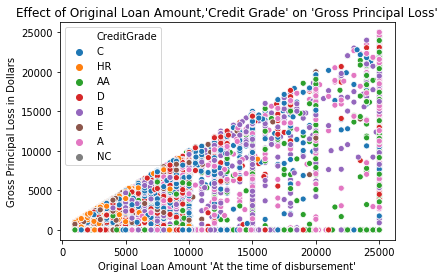

In [161]:
# Multivariate Exploration
sb.scatterplot(data = df, y = 'LP_GrossPrincipalLoss', x = 'LoanOriginalAmount', hue = 'CreditGrade')
plt.title("Effect of Original Loan Amount,'Credit Grade' on 'Gross Principal Loss'")
plt.ylabel("Gross Principal Loss in Dollars")
plt.xlabel("Original Loan Amount 'At the time of disbursement'");

From the above multivariate figure it can be identified that there exists a relation between Original Loan Amount and Gross Principal Loss alongwith credit grade. As, Number of Loans with Gross Principal loss in smaller ticket size loans are more than Larger Loans and mostly Credit grade HR, C and D are occupying places less than 10000 dollars amount. Whereas, for large loans(Amounting Greater than dollars 10000) mostly AA, B and A are occupying places in figure. Though, for larger amounting loan the density is less but severity of hitting a loss is also high. Hence, both the factors should be taken into consideration before strategising.

In [148]:
# Getting Idea about the Occupation data.
df['Occupation'].nunique()

67

#### Q 5. Is Gross Principle Loss showing difference depending upon Occupation of the Borrower ?

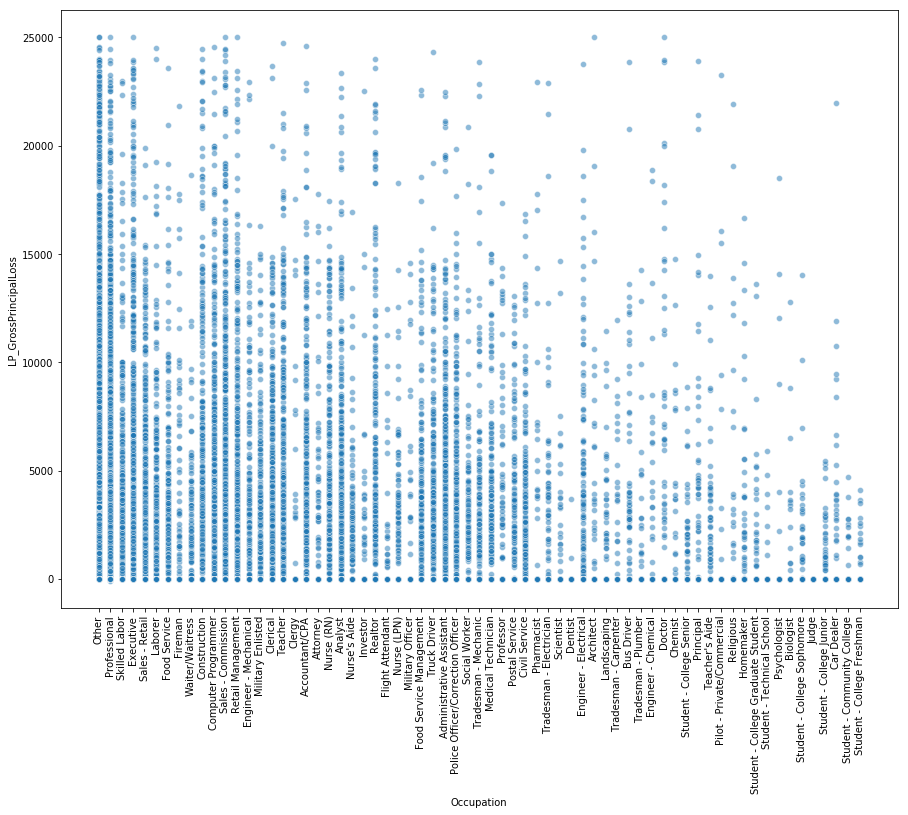

In [108]:
plt.figure(figsize= (15, 11))
sb.scatterplot(data = df, x = 'Occupation', y = 'LP_GrossPrincipalLoss', alpha = 1/2)
plt.xticks(rotation = 90)
plt.title("Effect of 'Credit Grade' And 'Borrower Being Home Owner or Not' on Goss Principal Loss")
plt.ylabel("Gross Principal Loss in Dollars")
plt.xlabel("The Prosper Rating assigned at the time the listing was created between AA - HR.");

Certain Professional Occupations can be less risky in terms of Gross Principal Loss and highly profitable. Hence, Prosper Financial Institution can focus upon these occupations and encourage certain categories to improve its profitability like for example 'student - College Freshman' are less dense and the severity of loss is also less, hence these category of loanees are good risk. And there are certain Occupation from which Financial Company can refrain a little to avoid losses those are for example Construction, Sales - Commission. Although, this insight is preliminary and needs to go through certain statistical validation. 

In [150]:
# Getting idea about Credit Grade data and its type
df['CreditGrade'].unique()

array(['C', nan, 'HR', 'AA', 'D', 'B', 'E', 'A', 'NC'], dtype=object)

#### Q 6. Does Credit Grading has any effect on Gross Principal Loss ?

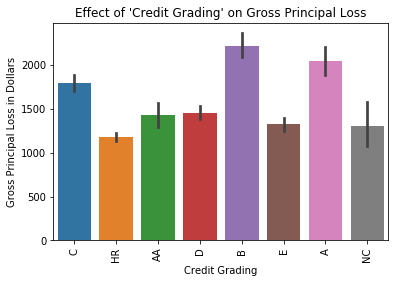

In [156]:
# Bivariate Exploration
sb.barplot(data = df, y = 'LP_GrossPrincipalLoss', x = 'CreditGrade')
plt.xticks(rotation = 90);
plt.title("Effect of 'Credit Grading' on Gross Principal Loss")
plt.ylabel("Gross Principal Loss in Dollars")
plt.xlabel("Credit Grading");

From the above figure it can be seen that Credit Grading Categories like HR, E, NC are showing the least Gross Pricipal Losses. Whereas, Credit Grading like B, A and C are showing highest Gross Principal Losses.

#### Q 7. Does Gross Principal Loss differs based upon Borrower's State ?

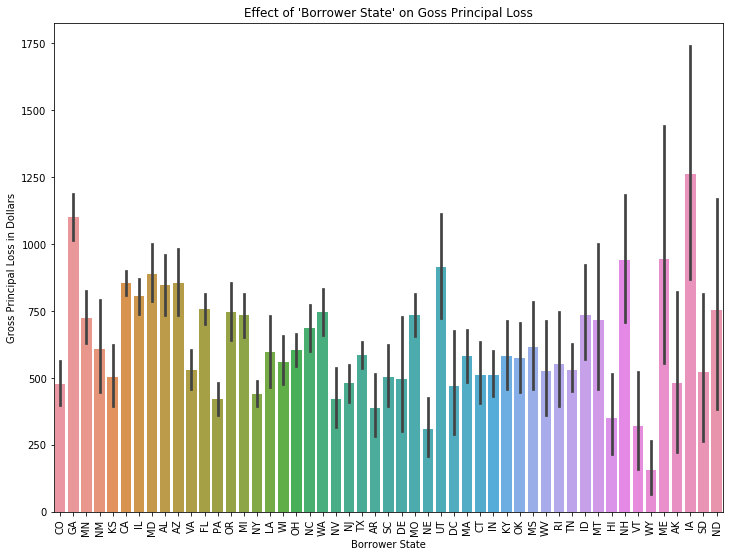

In [154]:
# Bivariate Plotting
plt.figure(figsize=(12,9))

sb.barplot(data = df, y = 'LP_GrossPrincipalLoss', x = 'BorrowerState')
plt.xticks(rotation = 90);
plt.title("Effect of 'Borrower State' on Goss Principal Loss")
plt.ylabel("Gross Principal Loss in Dollars")
plt.xlabel("Borrower State");

From the above plot, it is indicated that Gross Principal Loss varies with the State.

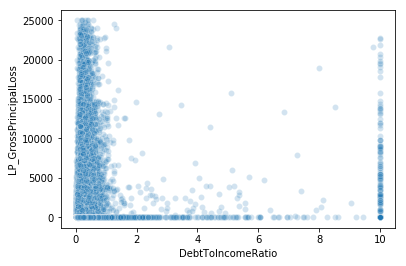

In [151]:
# Bivariate. Tried finding something interesting but does'nt make much sense and lead to dead end.
sb.scatterplot(data = df, x = 'DebtToIncomeRatio', y = 'LP_GrossPrincipalLoss', alpha = 1/5)

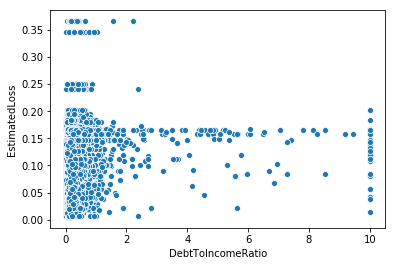

In [155]:
# Bivariate. Tried finding something interesting but does'nt make much sense and leads to dead end.
sb.scatterplot(data = df, y = 'EstimatedLoss', x = 'DebtToIncomeRatio')

In [162]:
# Knowing the data type for Is borrower Home owner Column.
df['IsBorrowerHomeowner'].unique()

array([ True, False])

# Explanatory

#### Q 8. Is there a combined effect of Credit Grade and Borrower owning a Home or Mortgage Loan History on Gross Principal Loss ?

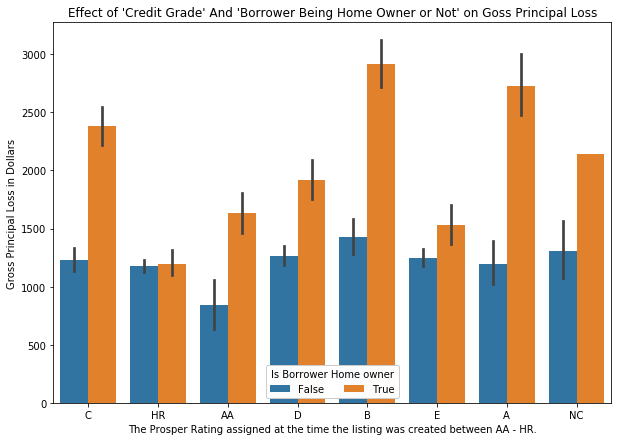

In [163]:
# Multivariate
plt.figure(figsize= (10, 7))
ax = sb.barplot(data = df, x = 'CreditGrade', y = 'LP_GrossPrincipalLoss', hue = 'IsBorrowerHomeowner')
ax.legend(loc = 8, ncol = 3, framealpha = 4, title = 'Is Borrower Home owner')
plt.title("Effect of 'Credit Grade' And 'Borrower Being Home Owner or Not' on Goss Principal Loss")
plt.ylabel("Gross Principal Loss in Dollars")
plt.xlabel("The Prosper Rating assigned at the time the listing was created between AA - HR.");

The ones with Prosper Rating A,B and C and having a mortgage on their credit profile or provide documentation confirming they are a homeowner are most likely to hit Gross Principal Loss on the balance sheet of Prosper Loans. In contrast to the group of Borrowers having Prosper Rating AA, A and HR and not having a mortgage on their credit profile or provided any documention confirming the same are least likely to show Gross Principal Losses and so they are least risky borrowers to whom loans can be disbersed. Although, its just an insight and needs further investigation.

#### Q 9. Is Income Range and Borrower Being Home Owner has effect on Gross Principal Loss?

In [164]:
# Multivariate
plt.figure(figsize= (13,8))
ax = sb.barplot(data = df, x = 'IncomeRange', y = 'LP_GrossPrincipalLoss', hue = 'IsBorrowerHomeowner')
ax.legend(loc = 8, ncol = 3, framealpha = 2, title = 'Is Borrower Home owner')
plt.title("Effect of Borrower's Income Range' And 'Borrower Being Home Owner or Not' on Gross Principal Loss")
plt.ylabel("Gross Principal Loss in Dollars")
plt.xlabel("Annual Income Range of The Borrower in Dollars");


The ones with Zero Income and the ones with income 'Not Displayed' but having a mortgage on their credit profile or provided documentation confirming they are a homeowner are most likely to hit Gross Principal Loss on the balance sheet of Prosper Loans. In contrast, the group of loanees with income range dollars (100,000+) & dollars (75000 - 99,999) with no mortgage on their credit profile or have'nt provided documentation confirming being homeowner are best prospects which can boost in increasing the profitabilty for Prosper Loans as these group of Borrower are having least Gross Principal Losses. We also saw in one of the figures above in Q 2. that Most many borrower fall under the category of Annual Income range of dollars 25,000 - 49,999 and dollars 50,000 - 74,999 and so, the profitability of these income Groups is also not so bad in terms of Losses due to Gross Principal. Hence, these above mentioned income groups and not owning a home categories can be a good focus areas for the Proper Group.

Although, this is just an insight and needs further investigation.
Not employed category Group being an exception with no mortgage on credit profile is having high Gross Principal Losses could be due to some other reason not known.

#### Q 10.  Does Prosper Score (A Custom Risk Score Built By Prosper Historical Data) and Term Of The Loan has any effect on the Gross Principal Loss?

In [165]:
# Multivariate Plot
plt.figure(figsize= (12, 8))
ax = sb.barplot(data = df, x = 'ProsperScore', y = 'LP_GrossPrincipalLoss', hue = 'Term')
ax.legend(loc = 8, ncol = 3, framealpha = 2, title = 'Term Of The Loan In Months')
plt.title("Effect of Borrower's Prosper Score' And 'Term Of The Loan In Months' on Goss Principal Loss")
plt.ylabel("Gross Principal Loss in Dollars")
plt.xlabel("Prosper Custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.");

Very Short Term Loans with Loan Term of 12 Months with Higher Prosper Score can be the least risky loans to be given by the Financial Instution. vis. Prosper Score with 10, 9, 8 and 7 with Term 12 months can be the best possible option to reduce Gross Principal Losses. In contrast, group of Borrowers having Prosper Score with 1, 5 and 6 and having Term of the Loan as 36 Months or 60 Months are showing the highest Gross Principal Losses, amongst these group with Prosper Rating 1 being the leader in Gross Principal Losses Highest. Although, this is just an insight and has its limitations.

=====================================================================================================================

## Some exploration Lead to dead end in finding answer and certain exploration lead to great interesting insights. Hence, Summary of the findings in a nutshell are as below. (Albiet, these are just insights and has its limitations.)

### Summary:

(1) We got an idea that most of the borrowers fall under the category of C, D and B category of Credit Grade.

(2) Most many borrower fall under the category of Annual Income range of dollars 25,000 - 49,999 and dollars 50,000 - 74,999, both are nearly double than any other categories when compared individually.

(3) Different group of borrowers based upon Income Range showed different Gross Principal Losses. 

(4) There exists a relation between Original Loan Amount and Gross Principal Loss alongwith credit grade. As, Number of Loans with Gross Principal loss in smaller ticket size loans are more than Larger Loans and mostly Credit grade HR, C and D are occupying places less than 10000 dollars amount. Whereas, for large loans(Amounting Greater than dollars 10000) mostly AA, B and A are occupying places in figure. Though, for larger amounting loan the density is less but severity of hitting a loss is also high. Hence, both the factors should be taken into consideration before strategising.

(5) Certain Professional Occupations can be less risky in terms of Gross Principal Loss and highly profitable. Hence, Prosper Financial Institution can focus upon these occupations and encourage certain categories to improve its profitability like for example 'student - College Freshman' are less dense and the severity of loss is also less, hence these category of loanees can be a good risk.

(6) It can be seen that Credit Grading Categories like HR, E, NC are showing the least Gross Pricipal Losses. Whereas, Credit Grading like B, A and C are showing highest Gross Principal Losses.

(7) Gross Principal Loss varies with the State.

(8) The ones with Prosper Rating A,B and C and having a mortgage on their credit profile or provide documentation confirming they are a homeowner are most likely to hit Gross Principal Loss on the balance sheet of Prosper Loans. In contrast to the group of Borrowers having Prosper Rating AA, A and HR and not having a mortgage on their credit profile or provided any documention confirming the same are least likely to show Gross Principal Losses and so they are least risky borrowers to whom loans can be disbersed. Although, its just an insight and needs further investigation.

(9) The ones with Zero Income and the ones with income 'Not Displayed' but having a mortgage on their credit profile or provided documentation confirming they are a homeowner are most likely to hit Gross Principal Loss on the balance sheet of Prosper Loans. In contrast, the group of loanees with income range dollars (100,000+) & dollars (75000 - 99,999) with no mortgage on their credit profile or have'nt provided documentation confirming being homeowner are best prospects which can boost in increasing the profitabilty for Prosper Loans as these group of Borrower are having least Gross Principal Losses.  Most many borrower fall under the category of Annual Income range of dollars 25,000 - 49,999 and dollars 50,000 - 74,999 and so, the profitability of these income Groups is also not so bad in terms of Losses due to Gross Principal. Hence, these above mentioned income groups and not owning a home categories can be a good focus areas for the Proper Group.

(10) Very Short Term Loans with Loan Term of 12 Months with Higher Prosper Score can be the least risky loans to be given by the Financial Instution. vis. Prosper Score with 10, 9, 8 and 7 with Term 12 months can be the best possible option to reduce Gross Principal Losses. In contrast, group of Borrowers having Prosper Score with 1, 5 and 6 and having Term of the Loan as 36 Months or 60 Months are showing the highest Gross Principal Losses, amongst these group with Prosper Rating 1 being the leader in Gross Principal Losses Highest.

